# 652 Week 4 Tips and Tricks #

Jamie White 

Revision: [ F2021 20 September 2021 ]

## Before starting your assignments... ##

... make a clean copy of your notebook in case you have to start over.

In Coursera:

`File > Make a copy...`

## Remember to work through the Week 4 networkX tutorial ##

## <font color='red'>Warning! </font>

<font color='red' size=2>Please **AVOID** using `community` and `modularity` as your variable names. These are imported as preserved names for networkx submodules. Changing their representations would result in autograder failuers.</font>

## <font color='green'>Advice </font>

<font color='Green' size=2>You do not need to run the notebook Girvan-Newman.ipynb</font>

There is a pickle file with the output in assets. Just load it as instructed.

## Load some libraries to get started... ##

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import operator
import random

In [3]:
import json
# %matplotlib inline

## How are communities represented in networkX? ##

In Assignment 4, a community (singular) is a set of node ID's.  The communities (plural) are contained in a list. Thus,

In [4]:
# each community is a set of node ID's. sample_communities is a list of communities

sample_communities = [

{512, 513, 514, 515, 516, 517},
{96, 97, 92, 93, 94, 95},
{288, 289, 290, 285, 286, 287},
{0, 1, 2, 3, 4, 5}
]

In [5]:
type(sample_communities)

list

In [6]:
a_community = sample_communities[0]
a_community

{512, 513, 514, 515, 516, 517}

In [7]:
type(a_community)

set

In [8]:
another_community =  sample_communities[1]
another_community

{92, 93, 94, 95, 96, 97}

In [9]:
type(another_community)

set

## Communities in the Map of Science network ##

In [10]:
G = nx.read_gml('assets/MapOfScience.gml', label='id')

### Classes and communities ###

*If the different domains of science are communities, what are they?*

Below is a sample of the data for each node (here, nodes 0 and 1). Each node is represented as a tuple with a node label and a dictionary `(0,{...})`.  

In the dictionary for each node, the value for the 'Class' key indicates a domain of science. For Nodes 0 and 1, the domain of science is 'Applied', so they are part of the 'Applied' network community. The 'Class' of the community to which Nodes 0 and 1 belong is also 'Applied.'

In [11]:
# recall from the assignement
list(G.nodes(data=True))[0:2]

[(0,
  {'label': '0',
   'name': 'Accounting',
   'Class': 'Applied',
   'WikipediaUrl': 'https://en.wikipedia.org/wiki/Accounting'}),
 (1,
  {'label': '1',
   'name': 'Aerospace engineering',
   'Class': 'Applied',
   'WikipediaUrl': 'https://en.wikipedia.org/wiki/Aerospace_engineering'})]

In [12]:
# what are the classes?
list_of_communities = set([d['Class'] for n,d in G.nodes(data=True)]) # set of unique community labels
list_of_communities

{'Applied', 'Formal', 'Natural', 'Social'}

In [13]:
# classes are domains of science, let's make a list
domains = list(list_of_communities)
len(domains)

4

In [14]:
# let's grab 2 domains (communities)
domains = list(list_of_communities)[:2]
len(domains)

2

In [15]:
domains

['Natural', 'Formal']

In [16]:
# find the nodes in those domains (communities)
communities  = [set([n for n,d in list(G.nodes(data=True)) if (d['Class']) == domain]) for domain in domains]

In [17]:
# recall from above that communties are 
a_community  = communities[0]

# let's have a look
type(communities), len(communities), type(a_community), len(a_community), list(a_community)[:10]

(list, 2, set, 168, [285, 286, 287, 288, 289, 290, 291, 292, 293, 294])

## Partitions ###

Hint: Based on the Week 4 networkX tutorial.

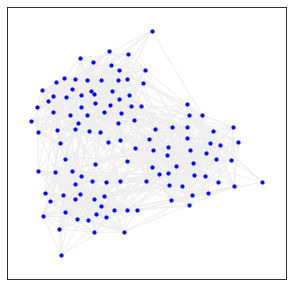

In [17]:
sizes = [50, 40, 30]
probs = [[0.25, 0.04, 0.03], [0.04, 0.3, 0.05], [0.03, 0.05, 0.40]]
G = nx.stochastic_block_model(sizes, probs, seed=0)
pos = nx.spring_layout(G)
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color='blue', node_size=10,
                edge_color='#eeeeee', width=1)

### What is this partition thing? ###

The partitioning algorithms return an iterator over tuples of sets of nodes in `G`. Each set of nodes is a community, each tuple is a sequence of communities at a particular level of the algorithm.

☞ "at a particular level of the algorithm" means the number of communities it finds. 

In [18]:
# uncomment the line below to have a look

# nx.algorithms.community.centrality.girvan_newman?

In [19]:
# use girvan_newman to generate partitions
partitions = nx.algorithms.community.centrality.girvan_newman(G)

In [20]:
# finding all the ways the algorithm split the graph
# partitions is a generator, so it is consumed when you run this cell.
partition_splits = list(partitions)

In [21]:
# How many possible ways did the algorithm split the graph into communities?
len(partition_splits)

119

In [22]:
# the partitions generator is consumed, so...
empty_generator = list(partitions)

In [23]:
# the list is not generated
len(empty_generator)

0

In [24]:
# find out how many communities were in the first split?
first_split = partition_splits[0]
len(first_split)

2

In [25]:
# recall each community is a set of nodes. 
# Convert the set to a list to look at 10 nodes
list(first_split[0])[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [26]:
# how many nodes were in the first community of the first split?
first_split_community_1 = first_split[0]
len(first_split_community_1)

50

In [27]:
# how many nodes were in the second community of the second split?
first_split_community_2 = first_split[1]
len(first_split_community_2)

70

In [28]:
# testing if node any nodes in  community_1 are in community_2
first_split_community_1 in first_split_community_2

False

In [29]:
# let's look at the second split
second_split = partition_splits[1]
# it looks like there are three communities in the second split
len(second_split)

3

In [30]:
# let's assign the communities to variables  
second_split_community_1 = second_split[0]
second_split_community_2 = second_split[1]
second_split_community_3 = second_split[2]

# and see how big they are
len(second_split_community_1),len(second_split_community_2),len(second_split_community_3)

(50, 40, 30)

### Testing or setting node properties based on community membership ###

The tutorial sets color for a plot by community, but you could set other properites, or you could test if the node meets some condition.

It might be useful to break down the steps for 3 communities

In [31]:
# pick some colors
color_list = ['green', 'red', 'blue', 'black']

# list of nodes without colors
node_color_list = [i for i in G.nodes]

# iterate through the nodes. i is a counter, n is the node ID
for i, n in enumerate(node_color_list):
    # if node is in the first community from the second split,
    # color it green
    if n in second_split_community_1:        
        node_color_list[i] = color_list[0]
        
    # if node is in the second community from the second split
    # color it red
    elif n in second_split_community_2:
        node_color_list[i] = color_list[1]
        
    # if node is in the third community from the second split
    # color it red
    elif n in second_split_community_3:
        node_color_list[i] = color_list[2]
                
    # otherwise color it grey
    else:
        node_color_list[i] = color_list[3]

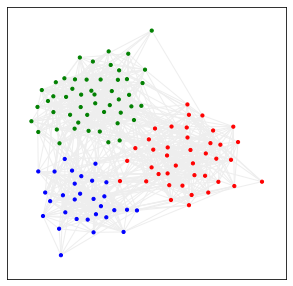

In [32]:
#see how we did

plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos=pos, with_labels=False, 
                 node_color=node_color_list, node_size=10,
                edge_color='#eeeeee', width=1)

#### Conclusion ####

Because there are few black nodes (I don't see any), and the three communities look separated, the second partition probably did a good job. 

The different metrics in Assignment 4 will quantitate the separation:

```
mod  = nx.community.modularity( G, nodes_by_domain                ) # modularity
cov  = nx.community.coverage(   G, nodes_by_domain                ) # coverage
perf = nx.community.performance(G, nodes_by_domain                ) # performance
den  = avg_measure(G, nodes_by_domain, density_one_community      ) # density
sep  = avg_measure(G, nodes_by_domain, separability_one_community ) # separability

```

## Good luck on Assignment 4! ##